In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/synthetic-e-commerce-sales-dataset-2025/synthetic_ecommerce_sales_2025.csv


# **Data Adquisition**

Proceso mediante el cual se obtienen los inputs y se hace el análisis pre exploración de la información.

In [2]:
data = pd.read_csv('/kaggle/input/synthetic-e-commerce-sales-dataset-2025/synthetic_ecommerce_sales_2025.csv')

In [3]:
# Visualizar los primeros valores
data.head()

,order_id,customer_id,product_category,product_price,quantity,order_date,region,payment_method,delivery_days,is_returned,customer_rating,discount_percent,revenue
0,1,bdd640fb-0667-4ad1-9c80-317fa3b1799d,Beauty,190.40,5,2023-02-21,Europe,BankTransfer,8,0,3.8,0,952.00
1,2,23b8c1e9-3924-46de-beb1-3b9046685257,Fashion,82.22,3,2023-10-13,North America,CreditCard,5,0,3.8,0,246.66
2,3,bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9,Beauty,15.19,2,2023-06-28,Oceania,Cash,6,1,2.0,10,27.34
3,4,972a8469-1641-4f82-8b9d-2434e465e150,Electronics,310.65,2,2023-07-11,Europe,PayPal,9,0,2.9,5,590.23
4,5,17fc695a-07a0-4a6e-8822-e8f36c031199,Fashion,74.05,4,2023-02-24,Africa,PayPal,3,1,3.1,20,236.96


In [4]:
# Detalles del dataset
print('Cantidad de registros: ', data.shape[0])
print('Cantidad de columnas: ', data.shape[1])

Cantidad de registros:  100000
Cantidad de columnas:  13


In [5]:
print('Nombres de columnas: \n',data.columns)

Nombres de columnas: 
 Index(['order_id', 'customer_id', 'product_category', 'product_price',
       'quantity', 'order_date', 'region', 'payment_method', 'delivery_days',
       'is_returned', 'customer_rating', 'discount_percent', 'revenue'],
      dtype='object')


In [6]:
print('Tipos de columnas: \n', data.dtypes)

Tipos de columnas: 
 order_id              int64
customer_id          object
product_category     object
product_price       float64
quantity              int64
order_date           object
region               object
payment_method       object
delivery_days         int64
is_returned           int64
customer_rating     float64
discount_percent      int64
revenue             float64
dtype: object


In [7]:
categorical_values = data.select_dtypes(include=['object']).columns
categorical_values = np.array(categorical_values)
print('Variables categoricas: ', categorical_values)

Variables categoricas:  ['customer_id' 'product_category' 'order_date' 'region' 'payment_method']


In [8]:
numerical_values = data.select_dtypes(include=['int64','float64']).columns
numerical_values = list(numerical_values)
print('Variables numericas: ', numerical_values)

Variables numericas:  ['order_id', 'product_price', 'quantity', 'delivery_days', 'is_returned', 'customer_rating', 'discount_percent', 'revenue']


# **Exploratory Data Analytics**

In [9]:
# Primero eliminaremos los valores que no nos sirven como parte del análisis
data_adjust = data.drop(columns=['order_id','customer_id'])
data_adjust.head()

,product_category,product_price,quantity,order_date,region,payment_method,delivery_days,is_returned,customer_rating,discount_percent,revenue
0,Beauty,190.40,5,2023-02-21,Europe,BankTransfer,8,0,3.8,0,952.00
1,Fashion,82.22,3,2023-10-13,North America,CreditCard,5,0,3.8,0,246.66
2,Beauty,15.19,2,2023-06-28,Oceania,Cash,6,1,2.0,10,27.34
3,Electronics,310.65,2,2023-07-11,Europe,PayPal,9,0,2.9,5,590.23
4,Fashion,74.05,4,2023-02-24,Africa,PayPal,3,1,3.1,20,236.96


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_13/4049164715.py:21: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


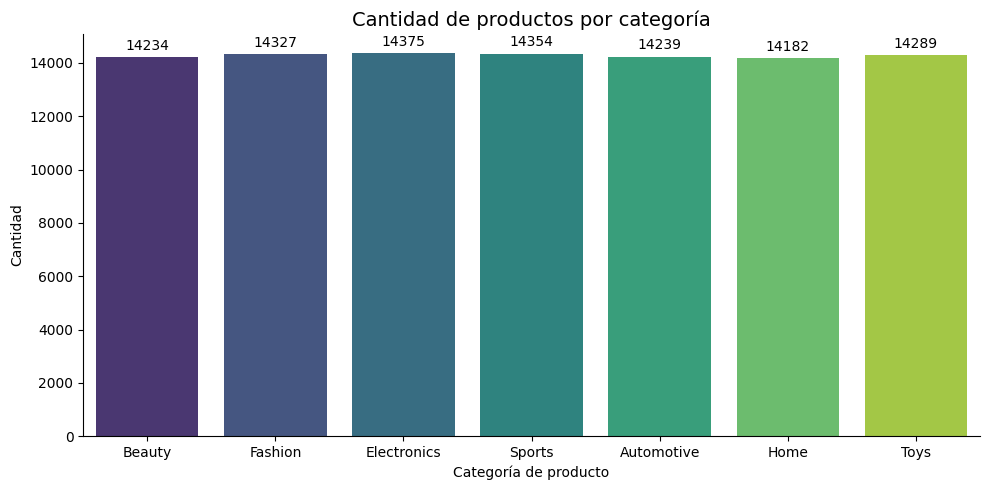

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plot = sns.catplot(
    data=data_adjust,
    x='product_category',
    kind='count',
    height=5, aspect=2,
    palette='viridis'
)

# Agregar etiquetas con el valor exacto encima de cada barra
for ax in plot.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=10, color='black')

plt.title('Cantidad de productos por categoría', fontsize=14)
plt.xlabel('Categoría de producto')
plt.ylabel('Cantidad')

plt.tight_layout()
plt.show()